In [10]:
from sklearn.decomposition import PCA
from deepface import DeepFace
import os
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
model_names = "VGG-Face, Facenet, Facenet512, OpenFace, DeepID, ArcFace, SFace, GhostFaceNet".split(", ")  
model_names

['VGG-Face',
 'Facenet',
 'Facenet512',
 'OpenFace',
 'DeepID',
 'ArcFace',
 'SFace',
 'GhostFaceNet']

In [8]:


# Obtener la lista de imágenes en la carpeta Dataset

dataset_folder = "Dataset"  # 'Dataset'
image_files = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Extraer embeddings de cada imagen
embeddings_dataset = []
for img_path in image_files:
    embedding_objs = DeepFace.represent(img_path, model_name=model_names[0])  # Usando el primer modelo de la lista
    # Si hay varias caras, guarda todas
    for obj in embedding_objs:
        embeddings_dataset.append({
            "identity": img_path,
            "embedding": obj["embedding"],
            "face_confidence": obj.get("face_confidence", None)
        })

# Mostrar cuántos embeddings se obtuvieron
len(embeddings_dataset)

6

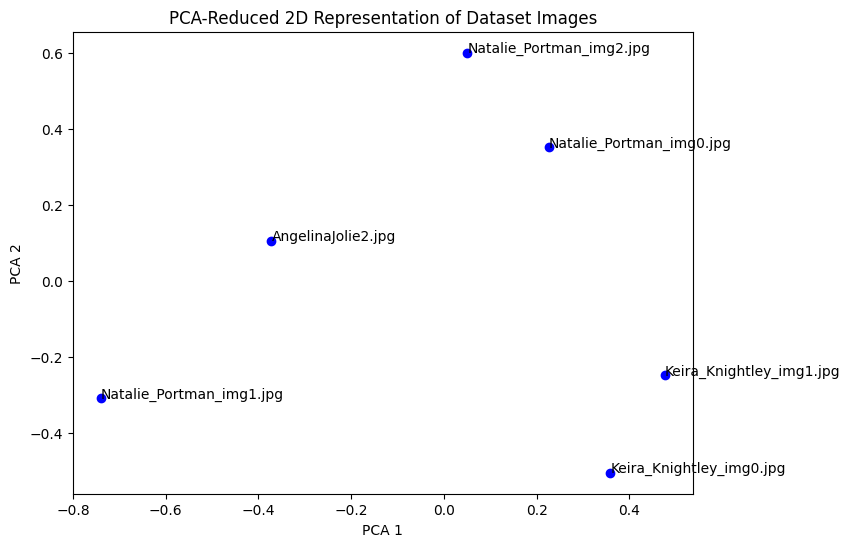

In [13]:
# Extraer embeddings y nombres de identidad
embeddings = [item["embedding"] for item in embeddings_dataset]
identities = [os.path.basename(item["identity"]) for item in embeddings_dataset]

# Reducir a 2D con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue')

for i, identity in enumerate(identities):
    plt.annotate(identity, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("PCA-Reduced 2D Representation of Dataset Images")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()